In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import decomposition, metrics, cluster, model_selection, neighbors

%matplotlib inline

In [2]:
gd = pd.read_csv('frame_areas.csv')
gd.head()

,A0_B,A0_G,A0_R,A10_B,A10_G,A10_R,A11_B,A11_G,A11_R,A12_B,...,A6_R,A7_B,A7_G,A7_R,A8_B,A8_G,A8_R,A9_B,A9_G,A9_R
0,107.367392,146.250910,201.760069,65.181003,94.064769,153.018719,48.684290,81.022130,116.061412,54.876088,...,171.173457,72.987708,104.297431,146.360000,51.947847,87.426929,132.483187,50.221929,64.179560,109.035008
1,107.366983,146.245262,201.759691,65.333804,94.058619,153.155424,48.708426,81.022299,116.086605,54.853117,...,171.632762,72.988850,104.300448,146.361181,51.960949,87.429560,132.484529,51.538056,64.058218,110.420756
2,107.520224,146.413642,201.892731,61.720448,93.260779,147.656590,48.280995,80.672531,115.859506,54.813148,...,168.104005,73.202323,104.558495,146.580733,52.135224,87.515147,132.571790,47.835779,63.823295,106.190394
3,106.228387,146.716026,201.057492,53.338812,83.717762,127.104136,28.486998,45.080679,73.082469,51.647832,...,154.294151,69.562546,100.953665,137.398588,53.373580,83.192060,128.229907,59.349568,92.719375,138.102269
4,108.422222,148.647454,206.050872,44.245679,71.261952,110.165208,35.811991,59.413318,85.385062,45.985725,...,118.296806,23.714198,35.799784,60.856505,43.565093,68.008727,109.909552,57.937091,92.877863,127.964082


In [3]:
gd.shape

(278, 48)

As colunas representam as médias dos valores de vermelho, verde e azul dos pixels das 278 imagens originais, quando divididas em 16 áreas (ou seja, como se fosse uma imagem com resolução 4x4 px).

In [4]:
gd.columns

Index(['A0_B', 'A0_G', 'A0_R', 'A10_B', 'A10_G', 'A10_R', 'A11_B', 'A11_G',
       'A11_R', 'A12_B', 'A12_G', 'A12_R', 'A13_B', 'A13_G', 'A13_R', 'A14_B',
       'A14_G', 'A14_R', 'A15_B', 'A15_G', 'A15_R', 'A1_B', 'A1_G', 'A1_R',
       'A2_B', 'A2_G', 'A2_R', 'A3_B', 'A3_G', 'A3_R', 'A4_B', 'A4_G', 'A4_R',
       'A5_B', 'A5_G', 'A5_R', 'A6_B', 'A6_G', 'A6_R', 'A7_B', 'A7_G', 'A7_R',
       'A8_B', 'A8_G', 'A8_R', 'A9_B', 'A9_G', 'A9_R'],
      dtype='object')

In [5]:
gd.dtypes

A0_B     float64
A0_G     float64
A0_R     float64
A10_B    float64
A10_G    float64
A10_R    float64
A11_B    float64
A11_G    float64
A11_R    float64
A12_B    float64
A12_G    float64
A12_R    float64
A13_B    float64
A13_G    float64
A13_R    float64
A14_B    float64
A14_G    float64
A14_R    float64
A15_B    float64
A15_G    float64
A15_R    float64
A1_B     float64
A1_G     float64
A1_R     float64
A2_B     float64
A2_G     float64
A2_R     float64
A3_B     float64
A3_G     float64
A3_R     float64
A4_B     float64
A4_G     float64
A4_R     float64
A5_B     float64
A5_G     float64
A5_R     float64
A6_B     float64
A6_G     float64
A6_R     float64
A7_B     float64
A7_G     float64
A7_R     float64
A8_B     float64
A8_G     float64
A8_R     float64
A9_B     float64
A9_G     float64
A9_R     float64
dtype: object

Em geral é difícil fazer algum sentido a partir de dados de alta dimensão.

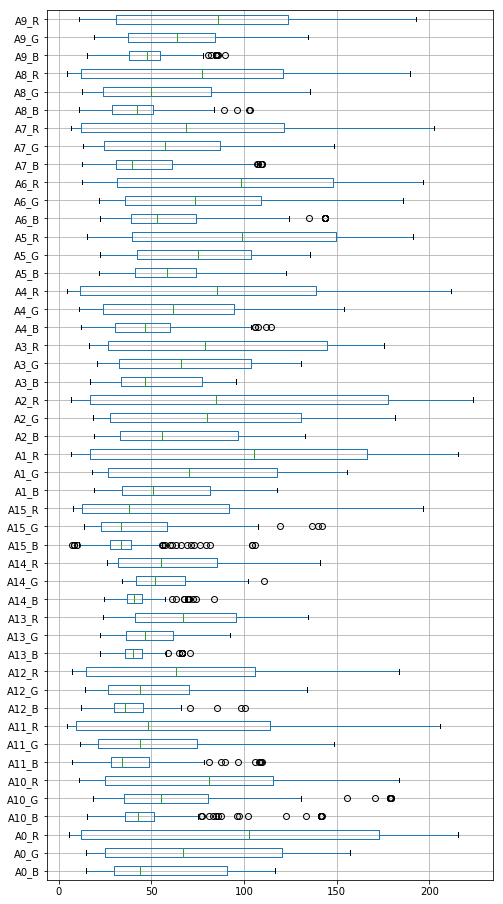

In [6]:
gd.boxplot(figsize=(8, 16), vert=False);

Podemos utilizar PCA para ver quanto de informação perderíamos ao reduzir para uma certa dimensão.

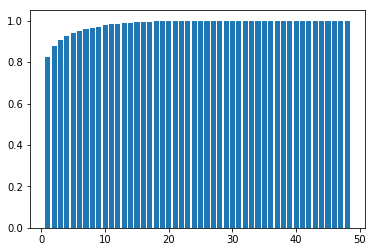

In [7]:
pca_cheio = decomposition.PCA(n_components=48)
pca_cheio.fit(gd)

explicacao = pca_cheio.explained_variance_ratio_.cumsum()
plt.bar(np.arange(48) + 1, explicacao);

In [8]:
pca_cheio.explained_variance_ratio_[:10].cumsum()

array([0.82273472, 0.87901152, 0.90513026, 0.92460857, 0.94155377,
       0.95197093, 0.95962232, 0.96630492, 0.97182753, 0.97720084])

Em geral é comum utilizar 2 componentes para termos uma visualização dos dados projetados, se as duas primeiras componentes tiveram uma explicação aceitável da variância.

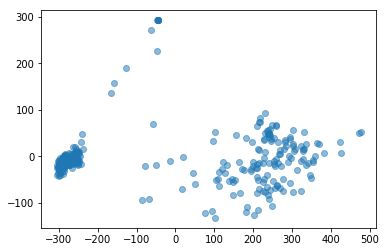

In [9]:
pca = decomposition.PCA(n_components=2)
pca.fit(gd)
gd_t = pca.transform(gd)
plt.scatter(gd_t[:, 0], gd_t[:, 1], alpha=0.5);

Podemos aplicar um agrupamento K-Means tanto nos dados originais como nos dados transformados, e em geral vai haver pouca diferença (se a variância explicada for alta o suficiente).

No entanto, lembre-se de transformar os centros de alta dimensão para 2 dimensões, se for mostrar os centros.

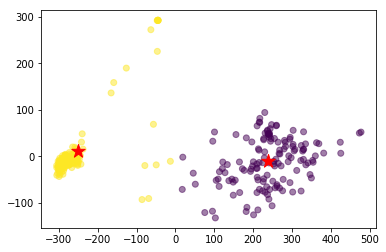

In [10]:
km2 = cluster.KMeans(n_clusters=2)
km2.fit(gd_t)
plt.scatter(gd_t[:, 0], gd_t[:, 1], c=km2.predict(gd_t), alpha=0.5)
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], marker='*', s=200, c='r');

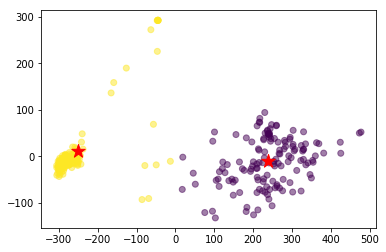

In [11]:
km48 = cluster.KMeans(n_clusters=2)
km48.fit(gd)
plt.scatter(gd_t[:, 0], gd_t[:, 1], c=km48.predict(gd), alpha=0.5)

t_center = pca.transform(km48.cluster_centers_)
plt.scatter(t_center[:, 0], t_center[:, 1], marker='*', s=200, c='r');

Outro algoritmo muito utilizado de agrupamento é o DBSCAN, que funcciona por densidade de grupos. Os hiper-parâmetros utilizados não incluem a quantidade de grupos, mas a distância máxima em que dois pontos são considerados próximos ("eps") e a quantidade mínima de pontos para que uma formação seja considerada um grupo.

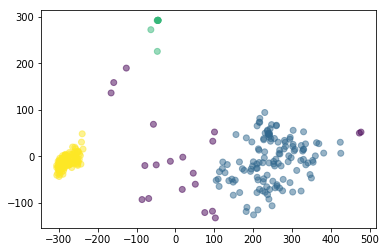

In [12]:
dbs = cluster.DBSCAN(eps=50, min_samples=5)
dbs.fit(gd_t)
plt.scatter(gd_t[:, 0], gd_t[:, 1], c=dbs.labels_, alpha=0.5);

Note que os pontos roxos não são do mesmo grupo (tanto que há dois pontos no extremo direito bastante distantes dos demais). Esses pontos representam _outliers_, que pertencem ao grupo -1.

In [13]:
dbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  1, -1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  1,  1,  1,
       -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

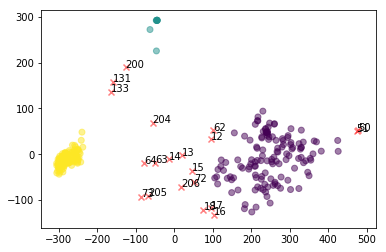

In [14]:
outliers = np.where(dbs.labels_ == -1)[0]
clustered = np.where(dbs.labels_ != -1)[0]

fig, ax = plt.subplots()

ax.scatter(gd_t[clustered, 0], gd_t[clustered, 1], c=dbs.labels_[clustered], alpha=0.5, marker='o')
ax.scatter(gd_t[outliers, 0], gd_t[outliers, 1], c='r', alpha=0.5, marker='x')

for idx in outliers:
    ax.annotate(idx, gd_t[idx, :])

Em geral, é difícil fazer algo com o resultado do agrupamento se não visualizar e explorar os dados. Na prática, é muito mais fácil tentar obter alguns rótulos para gerar um modelo supervisionado, do que investir em um modelo não-supervisionado ou semissupervisionado.

In [15]:
y = pd.Categorical(pd.read_csv('areas.data', header=None)[0])
y

[Broken Hills, Broken Hills, Broken Hills, Broken Hills, Broken Hills, ..., Broken Hills, Broken Hills, Broken Hills, Broken Hills, Broken Hills]
Length: 278
Categories (3, object): [Broken Hills, Loading Screen, Steps of Torment]

In [16]:
y.value_counts()

Broken Hills        148
Loading Screen       13
Steps of Torment    117
dtype: int64

A métrica Rand é similar à acurácia, mas considera que o nome do grupo não precisa ser o mesmo.

In [17]:
a = np.array([1, 1, 0, 0, 2])
b = np.array([0, 0, 1, 1, 2])
print(metrics.accuracy_score(y_true=a, y_pred=b))
print(metrics.cluster.adjusted_rand_score(labels_true=a, labels_pred=b))

0.2
1.0


In [18]:
metrics.cluster.adjusted_rand_score(labels_true=y.codes, labels_pred=dbs.labels_)

0.8716829314238613

In [19]:
metrics.cluster.adjusted_rand_score(labels_true=y.codes, labels_pred=km2.predict(gd_t))

0.8361801873080477

Outra técnica comum é a matriz de contingência, que é similar à matriz de confusão mas não é quadrada (podem haver mais grupos do que classes reais, e vice-versa).

In [20]:
cm = metrics.cluster.contingency_matrix(labels_true=y.codes, labels_pred=dbs.labels_)
pd.DataFrame(cm, index=y.categories, columns=sorted(np.unique(dbs.labels_)))

,-1,0,1,2
Broken Hills,17,131,0,0
Loading Screen,3,0,9,1
Steps of Torment,0,0,0,117


Ambas as métricas no entanto requerem que o vetor y (a função desejada) seja conhecido. Se esse for o caso, é mais simples utilizar um modelo supervisionado.

Existem diversas outras formas de avaliar um agrupamento, incluindo formas que não precisam do vetor y, mas essas métricas são específicas de espaços específicos do dados, e sua leitura/compreensão costuma ser difícil.

In [21]:
kf = model_selection.KFold(10)
for trainidx, testidx in kf.split(gd, y):
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(gd.values[trainidx, :], y[trainidx])
    pred = knn.predict(gd.values[testidx, :])
    print(metrics.accuracy_score(y_true=y[testidx], y_pred=pred))

1.0
1.0
1.0
1.0
0.9642857142857143
1.0
1.0
1.0
1.0
1.0


Como o código acima é muito comum (KFold => modelo => fit => predict => acurácia), existe uma função para abreviar o processo.

In [22]:
modelo = neighbors.KNeighborsClassifier(n_neighbors=5)
acuracias = model_selection.cross_val_score(
    X=gd.values,
    y=y.codes,
    cv=10,
    estimator=modelo)
acuracias.mean()

0.9929802955665025

Similarmente, poderíamos repetir o código acima para diferentes valores do hiper-parâmetro `n_neighbors`, mas é mais simples passar todos os valores possíveis e utilizar uma tabela gerada.

In [23]:
gridcv = model_selection.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid={'n_neighbors': [3, 5, 7, 9, 15]},
    cv=10,
    return_train_score=False)
gridcv.fit(gd, y.codes)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 9, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [24]:
result = pd.DataFrame(gridcv.cv_results_)
result['K'] = [3, 5, 7, 9, 15]
result.set_index('K').T

K,3,5,7,9,15
mean_fit_time,0.0012522,0.00114591,0.000978112,0.000945997,0.000960064
std_fit_time,0.000247333,0.000179594,6.71003e-05,1.0366e-05,2.09102e-05
mean_score_time,0.000999951,0.00102463,0.000895095,0.000901651,0.000968575
std_score_time,0.000118231,9.36825e-05,4.47985e-05,3.31638e-05,3.40742e-05
param_n_neighbors,3,5,7,9,15
params,{'n_neighbors': 3},{'n_neighbors': 5},{'n_neighbors': 7},{'n_neighbors': 9},{'n_neighbors': 15}
split0_test_score,1,1,1,1,1
split1_test_score,1,1,1,1,1
split2_test_score,0.965517,0.965517,0.965517,0.965517,0.965517
split3_test_score,1,1,1,1,1
